# PCA: details and visualization modes (French and English)

This notebook is rather self-contained, it has a couple of comments and explanations about the visualization of the result of a PCA and of its modes.
You should be able to read it by yourself, but having the teacher's explanation may help, too.

Ce calepin est plutôt auto-suffisant, il contient quelques commentaires et explications à propos de la visualisation du résultat d'une PCA, et la visualisation des modes d'une PCA.
Vous devriez pouvoir le lire par vous-même, même si le prof peut aider, aussi.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.decomposition

In [2]:
X = np.load('/home/flandes/data/fashion-mnist-reshaped.npz_FILES/train_images.npy')

In [3]:
## number of dimensions to reduce the data to.
## nombre de dimensions désiré en sortie.
n_comp = 28

In [4]:
## define an object of the class  decomposition.PCA
## on définit une instance de la classe  decomposition.PCA
classe_PCA = sklearn.decomposition.PCA(n_components=n_comp, random_state=42)
classe_PCA.fit(X)
transformationMatrix = classe_PCA.components_.transpose()

## reduce the data X to an array of 30-dimensional vectors (30-pixels "images")
# réduire les données à un tableau de 30 dimensions (une "image" de 30 pixels)
X_transformed = classe_PCA.transform(X)

## go back to the original space's dimensions (for visualization purposes)
## retourner dans l'espace de départ 
X_decompressed = classe_PCA.inverse_transform(X_transformed)


In [6]:
X.shape

(60000, 784)

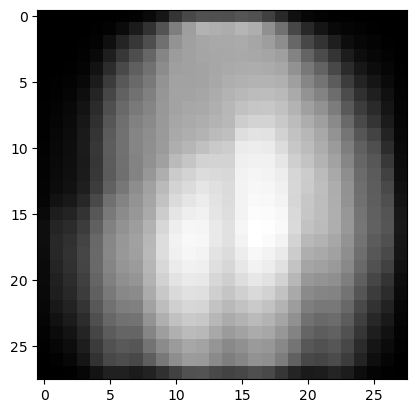

In [7]:
## average picture (average of all pictures)
## l'image moyenne de toutes les images
plt.imshow(np.mean(X, axis=0).reshape(28,28), plt.cm.gray)

## Visualization : before and after compression+decompression

**We first plot the 30 values in the new space (after PCA).**
Of course, it's meaningless.

**On affiche les valeurs de niveaux de gris dans le nouvel espace (après PCA)**
Évidemment, ça ne ressemble pas du tout à une image.

In [8]:
X_transformed[0], X_transformed[1]

(array([ -123.99379079,  1633.07439599, -1211.04119121,   240.79311832,
           -3.34835082,  -404.34045479,   -91.50551496,   201.37525708,
          -32.91574517,   -29.80936699,   148.27564315,   -66.48552768,
           49.49109254,  -137.27770169,   111.04955858,   -45.91613655,
          116.44446391,  -194.13803668,   426.37712045,  -209.24277233,
         -143.59544036,   168.04228359,   100.87008381,   -38.31988299,
          218.94701933,    47.324856  ,  -108.99581452,  -107.41657052]),
 array([1407.92885252, -451.64133562, -261.02703418,  366.436695  ,
         215.43755843, 1269.18318745, -148.35009146, -224.29245988,
        -115.631229  , -229.84514033,    2.49311418,  188.92468241,
        -251.34441934, -255.84342533,   41.57679838, -103.5424398 ,
         290.90627036,  363.84650347,   25.3125618 ,  232.99708511,
          -1.6507245 ,   94.23532235, -108.02078825,   85.3881126 ,
         169.14169737, -239.36919475,  -53.3654974 ,  -22.42501329]))

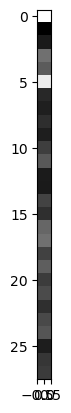

In [9]:
plt.imshow(X_transformed[1].reshape(28,1), plt.cm.gray)

**Now we plot the data after transormation + inverse transform.**


**Nous traçons maintenant les données après la transormation + transformée inverse**


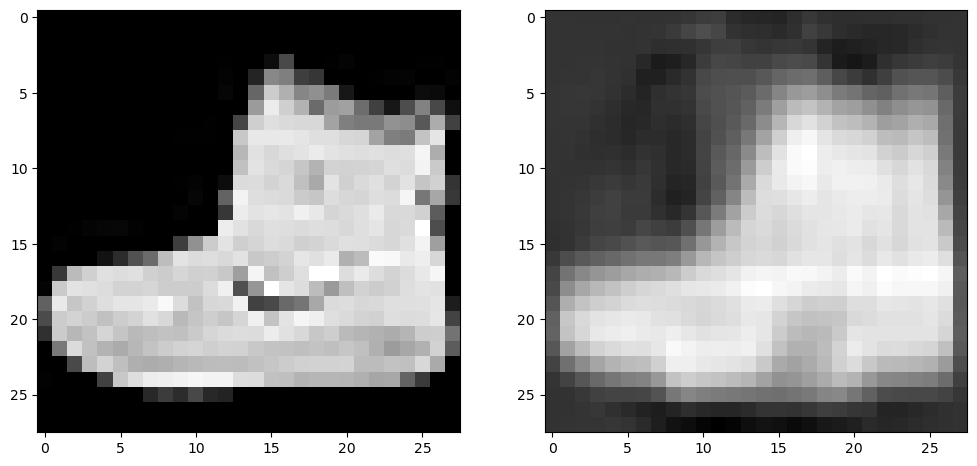

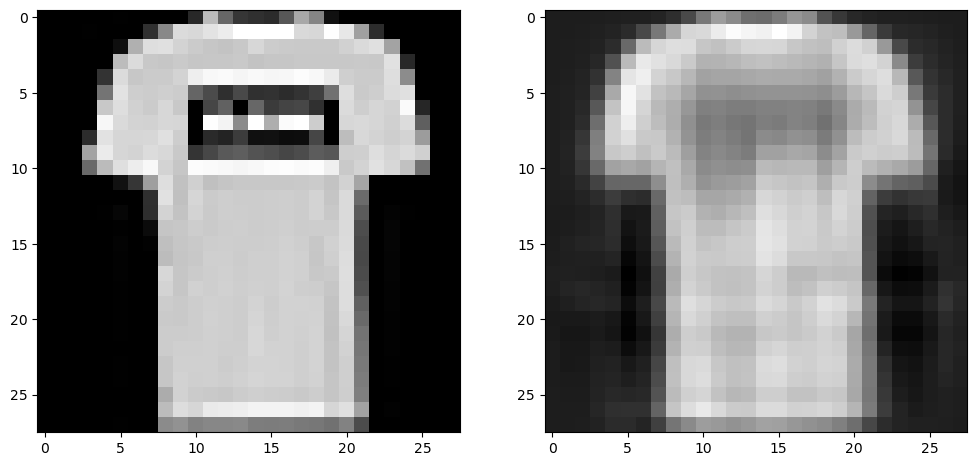

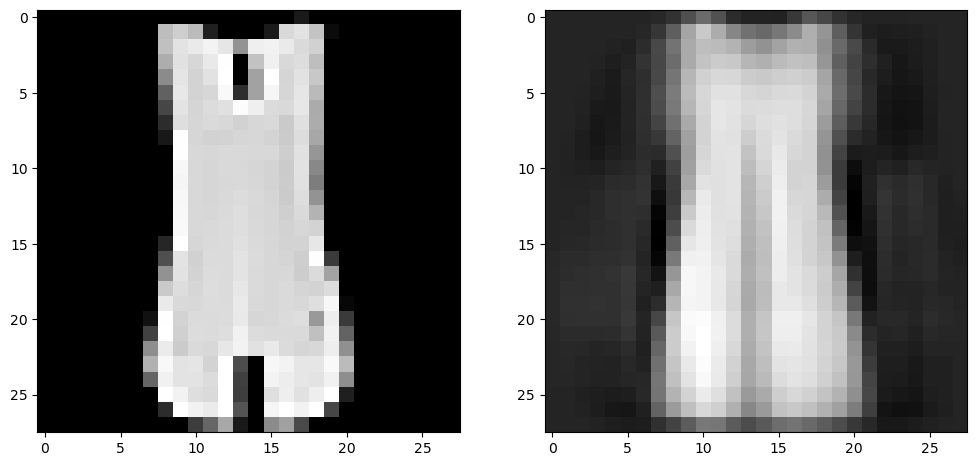

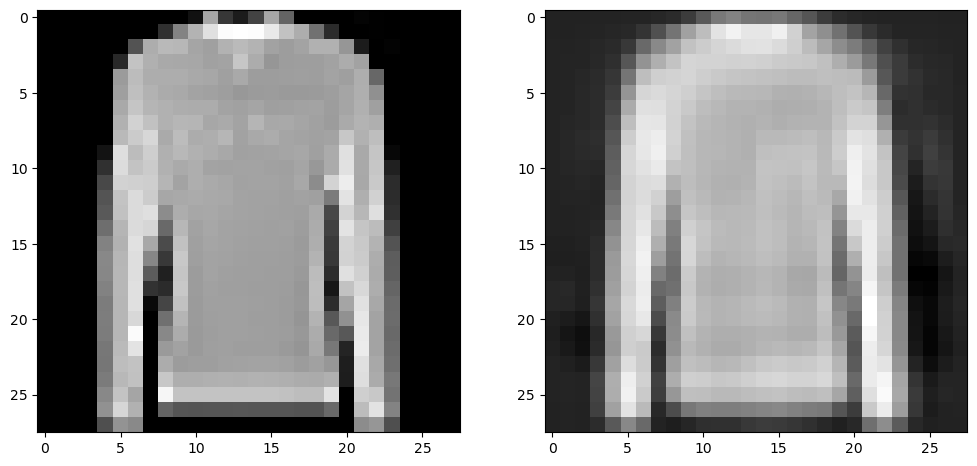

In [10]:

for imgNum in [0,1,4,742]:
    f, axarr = plt.subplots(1,2, figsize=(12,12))
    img = X[imgNum].reshape(28,28) ## original image (not compressed)
    axarr[0].imshow(img, plt.cm.gray)
    img = X_decompressed[imgNum].reshape(28,28) #compressed+decompressed image (with noise)
    axarr[1].imshow(img, plt.cm.gray)

## Visualization : modes of the transformation

Here we look at the things in the hidden space of `n_comp` dimensions, or rather, we look at how to go from the direct space to this weird space.

We can notice that some modes essentially correspond to some kind of general feature of the image: mode 3 seems to be the "shoe-ness" (chaussure-itude?) of the original image

----------

## Visualisation : modes de la transformation

Ici, nous regardons les choses dans l'espace caché de `n_comp` dimensions, ou plutôt, nous regardons comment aller de l'espace direct à cet espace bizarre.

Nous pouvons remarquer que certains modes correspondent essentiellement à une sorte de caractéristique générale de l'image : le mode 3 semble être la "chaussure-itude" de l'image originale.

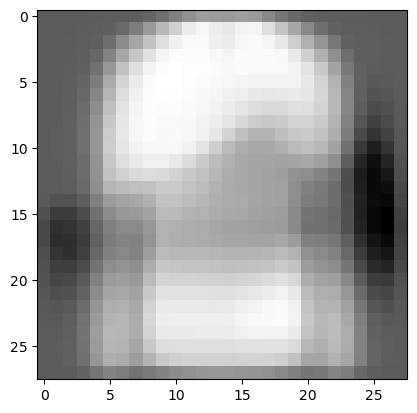

In [11]:
## display the tranformation, seen as an image
## (grey levels = values of the transformation coefficients)
# the transformation vector of mode number `numero_du_mode` can be reshaped as a 28x28 image,
# to see its coefficients visually


## affichage de la transformation, vue comme une image 
## (niveau de gris = valeurs des coeffs de transformation)
# le vecteur associé à la transformation du mode numero_du_mode peut être re-agencé comme une image 
# en 28x28 pixels, de sorte qu'on peut voir les coefficients de cette transformation, visuellement.

numero_du_mode = 0  ## mode number 
img = transformationMatrix[:,numero_du_mode].reshape(28,28) 
plt.imshow(img, plt.cm.gray)

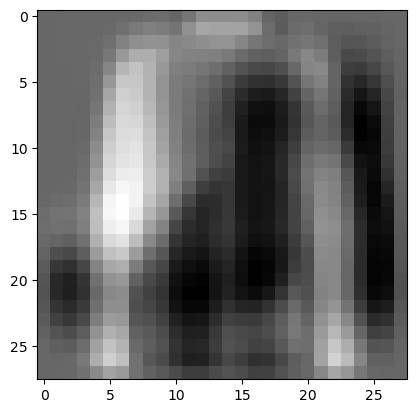

In [12]:
## display the tranformation, seen as an image
## (grey levels = values of the transformation coefficients)
# the transformation vector of mode number `numero_du_mode` can be reshaped as a 28x28 image,
# to see its coefficients visually


## affichage de la transformation, vue comme une image 
## (niveau de gris = valeurs des coeffs de transformation)
# le vecteur associé à la transformation du mode numero_du_mode peut être re-agencé comme une image 
# en 28x28 pixels, de sorte qu'on peut voir les coefficients de cette transformation, visuellement.

numero_du_mode = 2  ## mode number 
img = transformationMatrix[:,numero_du_mode].reshape(28,28) 
plt.imshow(img, plt.cm.gray)

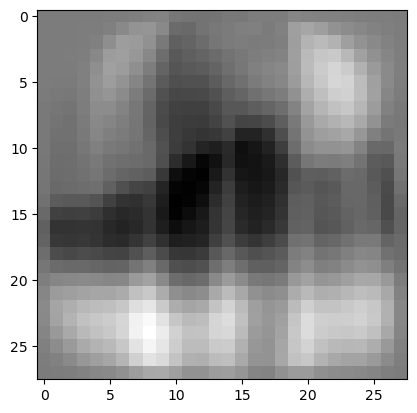

In [13]:
# same, for another mode
# idem, pour un autre mode
plt.figure()
numero_du_mode = 3
img = transformationMatrix[:,numero_du_mode].reshape(28,28)
plt.imshow(img, plt.cm.gray)

## Note: this kind of interpretation is not always clear when doing a PCA

In particular, some modes do not correspond to "belonging to some class"-ness, but instead may be something like "is there a dark spot in that region of the image", etc, so they can be shared by multiple classes.

---------


## Note: ce genre d'interprétation n'est pas toujours claire quand on fait une PCA

En particulier, certains modes ne correspondront pas à l'appartenance à une classe, mais correspondront à des choses partagées entre les classes, comme par exemple "y a t il une tâche sombre dant tel coin de l'image".